## House Price Prediction

**Description**

Based on data containing information from the 1990 California census, need to build an regression model (Ridge/ Lasso/ Elastic Net) to predict prices of house. This model will then be used by the management to understand how the house price is dependent on various features. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Responsibilities**

• The dataset has 80 variables related to a house. All data quality checks are performed, and all data quality issues are addressed in the right way (missing value imputation, removing duplicate data and other kinds of data redundancies, etc.). Data quality issues are clearly explained in comments.

• Do feature engineering to come up with new features that can be used to predict price.

• Check multicollinearity and take necessary action. Check relationship with target variables and take appropriate step to make sure they are normally distributed.

• Build regression model (Ridge/ Lasso/ Elastic Net) using regularization to predict prices of house.

## 1. Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',85)
pd.set_option('display.max_columns',80)

In [3]:
# reading the dataset
housing = pd.read_csv("C:\\Users\\budha\\datasets\\reg assignment\\train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

## Step2 : Data analysis

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
## Checking the percentage of missing values
round(100*(housing.isnull().mean()),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

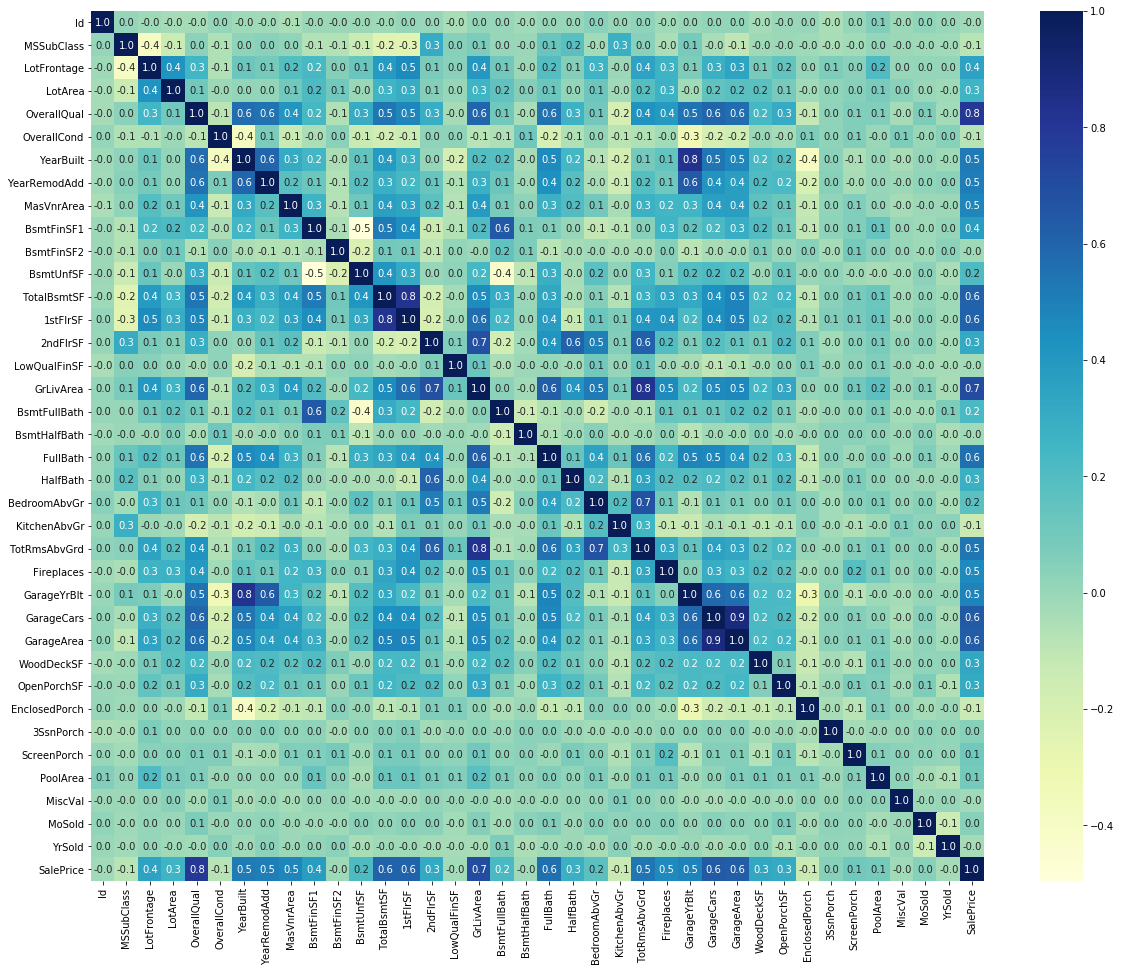

In [7]:
#see the correlation of the numeric variables
house_numeric = housing.select_dtypes(include=['float64', 'int64'])
cor = house_numeric.corr()
# plotting correlations on a heatmap
plt.figure(figsize=(20,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", fmt='.1f',annot=True)
plt.show()

In [8]:
house_numeric.shape

(1460, 38)

In [9]:
#variable - LotFrontage
housing.loc[housing.LotFrontage.isnull(),'LotFrontage'] = 0

In [10]:
#drop variables having high missing values
housing.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [11]:
housing.loc[housing.MasVnrType.isnull(),'MasVnrType'] = 'None'

In [12]:
#MasVnrArea
housing.loc[housing.MasVnrArea.isnull(),'MasVnrArea'] = 0.0

In [13]:
## Checking the percentage of missing values
round(100*(housing.isnull().mean()),2)

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBa

In [14]:
#all the basement related variables have similar missing values
housing.loc[housing.BsmtQual.isnull(), ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                                        'BsmtFinSF2','BsmtUnfSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF
17,NaN,NaN,NaN,NaN,0,NaN,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0


In [15]:
basements = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                                        'BsmtFinSF2','BsmtUnfSF']
for v in basements:
    print('\nFrequency count for variable %s'%v)
    print(housing[v].value_counts(dropna=False))


Frequency count for variable BsmtQual
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

Frequency count for variable BsmtCond
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

Frequency count for variable BsmtExposure
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

Frequency count for variable BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

Frequency count for variable BsmtFinSF1
0       467
24       12
16        9
20        5
686       5
       ... 
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dtype: int64

Frequency count for variable BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Frequency count for variable BsmtFinSF2
0       1293
180        5
374        3
551     

In [16]:
#Impute 'NA' for the basement related variables having missing value
housing.loc[housing.BsmtQual.isnull(), ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = 'NA'

In [17]:
## Checking the percentage of missing values
round(100*(housing.isnull().mean()),2)

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.07
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.07
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBa

In [18]:
#impute 'NA' for few remaining columns having missing value
housing.loc[housing.BsmtExposure.isnull(),'BsmtExposure'] = 'NA'
housing.loc[housing.BsmtFinType2.isnull(),'BsmtFinType2'] = 'NA'

In [19]:
#variable - Electrical
housing.Electrical.value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

In [20]:
#remove 1 row which has missing value for Electrical column
housing = housing.loc[~(housing.Electrical.isnull())]

In [21]:
#Create new feature 'garage_age' based on variable 'GarageYrBlt'
housing['garage_age'] = 2020 - housing.GarageYrBlt

In [22]:
#drop variable 'GarageYrBlt'
housing.drop('GarageYrBlt',axis=1,inplace=True)

In [23]:
#check variabls related to garage -
garage = ['GarageType','garage_age','GarageFinish','GarageQual','GarageCond']
for v in garage:
    print('\nFrequency count for variable %s'%v)
    print(housing[v].value_counts(dropna=False))


Frequency count for variable GarageType
Attchd     870
Detchd     387
BuiltIn     87
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Frequency count for variable garage_age
NaN      81
15.0     65
14.0     59
16.0     53
17.0     50
         ..
93.0      1
112.0     1
120.0     1
114.0     1
87.0      1
Name: garage_age, Length: 98, dtype: int64

Frequency count for variable GarageFinish
Unf    605
RFn    422
Fin    351
NaN     81
Name: GarageFinish, dtype: int64

Frequency count for variable GarageQual
TA     1310
NaN      81
Fa       48
Gd       14
Po        3
Ex        3
Name: GarageQual, dtype: int64

Frequency count for variable GarageCond
TA     1325
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64


In [24]:
#set a default high value (120) for garage_age which has missing value
housing.loc[housing.garage_age.isnull(),'garage_age'] = 120

In [25]:
#checl garage related variables -
housing.loc[housing.GarageType.isnull(), ['GarageType','garage_age','GarageFinish','GarageQual','GarageCond']]

,GarageType,garage_age,GarageFinish,GarageQual,GarageCond
39,NaN,120.0,NaN,NaN,NaN
48,NaN,120.0,NaN,NaN,NaN
78,NaN,120.0,NaN,NaN,NaN
88,NaN,120.0,NaN,NaN,NaN
89,NaN,120.0,NaN,NaN,NaN
99,NaN,120.0,NaN,NaN,NaN
108,NaN,120.0,NaN,NaN,NaN
125,NaN,120.0,NaN,NaN,NaN
127,NaN,120.0,NaN,NaN,NaN
140,NaN,120.0,NaN,NaN,NaN


In [26]:
#impute 'NA' for the missing data
housing.loc[housing.GarageType.isnull(), ['GarageType','GarageFinish','GarageQual','GarageCond']] = 'NA'

In [27]:
## Checking the percentage of missing values
round(100*(housing.isnull().mean()),2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath     

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [29]:
# all non-numeric  variables in the dataset
house_object = housing.select_dtypes(include='object')
house_object.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [30]:
#check all the non numeric attributes and corresponding data count -
house_object_cols = list(house_object.columns)

for v in house_object_cols:
    print('\nFrequency count for variable %s'%v)
    print(housing[v].value_counts(dropna=False))


Frequency count for variable MSZoning
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Frequency count for variable Street
Pave    1453
Grvl       6
Name: Street, dtype: int64

Frequency count for variable LotShape
Reg    924
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Frequency count for variable LandContour
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Frequency count for variable Utilities
AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

Frequency count for variable LotConfig
Inside     1051
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Frequency count for variable LandSlope
Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Frequency count for variable Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes   

In [31]:
#dropping few variables which is having other similar variable- 
housing.drop('Street',axis=1,inplace=True)
housing.drop('Utilities',axis=1,inplace=True)
housing.drop('Condition2',axis=1,inplace=True)
housing.drop('RoofMatl',axis=1,inplace=True)
housing.drop('Heating',axis=1,inplace=True)
housing.drop('GarageQual',axis=1,inplace=True)

In [32]:
# Merging several values into 'Others' for LotConfig
housing['LotConfig'] = housing['LotConfig'].apply(lambda x: 'FR' if x == 'FR2' 
                                                  else 'FR' if x == 'FR3'
                                                  else x)

In [33]:
# Merging several values into 'Others' for Condition1
housing['Condition1'] = housing['Condition1'].apply(lambda x: 1 if x == 'Norm' 
                                                  else 0)

In [34]:
# Merging several values into 'Others' for MasVnrType
housing['MasVnrType'] = housing['MasVnrType'].apply(lambda x: 0 if x == 'None' 
                                                  else 1)

In [35]:
#dropping below columns as majority of the data is for a single class
housing.drop('Neighborhood',axis=1,inplace=True)
housing.drop('Exterior2nd',axis=1,inplace=True)
housing.drop('ExterCond',axis=1,inplace=True)
housing.drop('BsmtCond',axis=1,inplace=True)
housing.drop('BsmtFinType2',axis=1,inplace=True)
housing.drop('GarageCond',axis=1,inplace=True)

In [36]:
# Merging several values into 'Others' for HouseStyle
housing['HouseStyle'] = housing['HouseStyle'].apply(lambda x: '1Story' if x == '1Story'
                                                    else '2Story' if x == '2Story'
                                                    else 'Other')

In [37]:
# Merging several values into 'Others' for Exterior1st
housing['Exterior1st'] = housing['Exterior1st'].apply(lambda x: 'Other' if x in ['CemntBd','BrkFace','WdShing',
                                                                                'Stucco','AsbShng','Stone','BrkComm',
                                                                                'AsphShn','CBlock','ImStucc']
                                                  else x)

In [38]:
# Merging several values for Foundation
housing['Foundation'] = housing['Foundation'].apply(lambda x: 'Other' if x in ['Slab','Stone','Wood']
                                                  else x)

In [39]:
# Merging several values for HeatingQC
housing['HeatingQC'] = housing['HeatingQC'].apply(lambda x: 'Below_avg' if x in ['TA','Fa','Po']
                                                  else x)

In [40]:
# var - Electrical
housing['Electrical'] = housing['Electrical'].apply(lambda x: 1 if x == 'SBrkr'
                                                  else 0)

In [41]:
# Merging several values for Functional
housing['Functional'] = housing['Functional'].apply(lambda x: 'Min' if x in ['Min1','Min2']
                                                    else 'Maj' if x in ['Maj1','Maj2','Sev']
                                                  else x)

In [42]:
# Merging several values for GarageType
housing['GarageType'] = housing['GarageType'].apply(lambda x: 1 if x in ['Attchd','BuiltIn','Basment']
                                                    else 0)                                               

In [43]:
#var- PavedDrive
housing['PavedDrive'] = housing['PavedDrive'].apply(lambda x: 1 if x == 'Y'
                                                  else 0)

In [44]:
# Merging several values into 'Others' for SaleType
housing['SaleType'] = housing['SaleType'].apply(lambda x: 'WD' if x =='WD'
                                                    else 'New' if x=='New'
                                                    else 'Other')

In [45]:
# Merging several values into 'Others' for SaleCondition
housing['SaleCondition'] = housing['SaleCondition'].apply(lambda x: 1 if x == 'Normal'
                                                  else 0)

In [46]:
# var - CentralAir
housing['CentralAir'] = housing['CentralAir'].apply(lambda x: 1 if x == 'Y'
                                                  else 0)

In [47]:
#Checking the value count for non numeric variables -
house_object = housing.select_dtypes(include='object')
house_object_cols = list(house_object.columns)

for v in house_object_cols:
    print('\nFrequency count for variable %s'%v)
    print(housing[v].value_counts(dropna=False))


Frequency count for variable MSZoning
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Frequency count for variable LotShape
Reg    924
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Frequency count for variable LandContour
Lvl    1310
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Frequency count for variable LotConfig
Inside     1051
Corner      263
CulDSac      94
FR           51
Name: LotConfig, dtype: int64

Frequency count for variable LandSlope
Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Frequency count for variable BldgType
1Fam      1219
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Frequency count for variable HouseStyle
1Story    726
2Story    445
Other     288
Name: HouseStyle, dtype: int64

Frequency count for variable RoofStyle
Gable      1140
Hip         286
Flat         13
Gambrel      11
Mansard       7
S

In [48]:
#total count of non numeric variables -
house_object = housing.select_dtypes(include='object')
house_object_cols = list(house_object.columns)
len(house_object_cols)

19

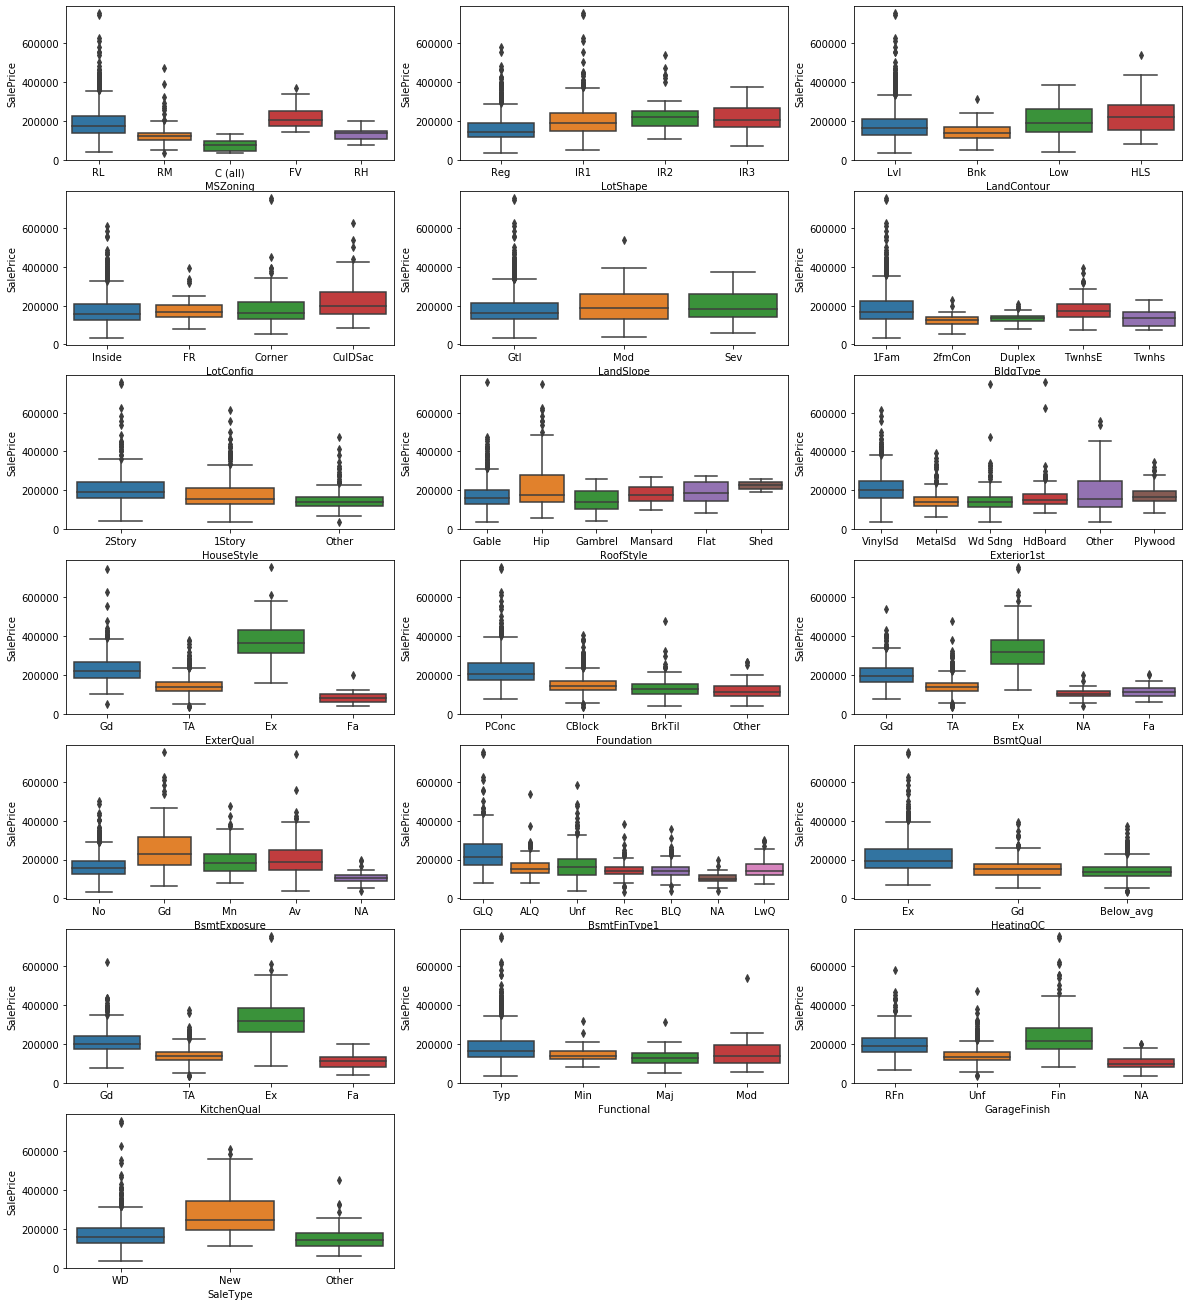

In [49]:
#Plot the non numeric features againt target -
house_object = housing.select_dtypes(include='object')
house_object_cols = list(house_object.columns)
plt.figure(figsize=(20, 30))
for i,v in enumerate(house_object_cols):
    plt.subplot(9,3,i+1)
    sns.boxplot(x = housing[v], y = housing['SalePrice'])

In [50]:
# Merging several values into 'Others' for BsmtFinType1
housing['BsmtFinType1'] = housing['BsmtFinType1'].apply(lambda x: 'GLQ' if x =='GLQ'
                                                    else 'ALQ' if x=='ALQ'
                                                    else 'Unf' if x=='Unf'
                                                    else 'Other')

In [51]:
# Merging several values for BsmtQual
housing['BsmtQual'] = housing['BsmtQual'].apply(lambda x: 'Fa_NA' if x in ['NA','Fa']
                                                    else x)

In [52]:
# Merging several values for MSSubClass -
housing['MSSubClass'] = housing['MSSubClass'].apply(lambda x: '1_Story' if x in [20,30,40]
                                        else '2_Story' if x in [60,70]
                                        else '1.5_Story' if x in [50,45]
                                        else 'Others')

In [53]:
# var - LandContour
housing['LandContour'] = housing['LandContour'].apply(lambda x: 1 if x == 'Lvl'
                                                  else 0)

In [54]:
# var - LandSlope
housing['LandSlope'] = housing['LandSlope'].apply(lambda x: 1 if x == 'Gtl'
                                                  else 0)

In [55]:
# var - BsmtExposure
housing['BsmtExposure'] = housing['BsmtExposure'].apply(lambda x: 1 if x in ['Av','Gd','Mn']
                                                  else 0)

In [56]:
# Merging several values into 'Others'
housing['RoofStyle'] = housing['RoofStyle'].apply(lambda x: 1 if x == 'Gable'
                                                  else 0)

In [57]:
# Merging several values for MSZoning
housing['MSZoning'] = housing['MSZoning'].apply(lambda x: 1 if x == 'RL'
                                                  else 0)

In [58]:
# Merging several values for LotShape
housing['LotShape'] = housing['LotShape'].apply(lambda x: 1 if x == 'Reg'
                                                  else 0)

In [59]:
# Merging several values for KitchenQual
housing['KitchenQual'] = housing['KitchenQual'].apply(lambda x: 1 if x in ['Gd','Ex']
                                                  else 0)

In [60]:
# Merging several values for BldgType
housing['BldgType'] = housing['BldgType'].apply(lambda x: 1 if x == '1Fam'
                                                  else 0)

In [61]:
# Merging several values for Functional
housing['Functional'] = housing['Functional'].apply(lambda x: 1 if x == 'Typ'
                                                  else 0)

#### Check the Numeric variables

In [62]:
# all numeric (float and int) variables in the dataset
house_numeric = housing.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LandSlope,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,MasVnrType,MasVnrArea,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,garage_age
0,1,65.0,8450,1,1,1,1,1,7,5,2003,2003,1,1,196.0,0,706,0,150,856,1,1,856,854,0,1710,1,0,2,1,3,1,1,8,1,0,1,2,548,1,0,61,0,0,0,0,0,2,2008,1,208500,17.0
1,1,80.0,9600,1,1,1,0,1,6,8,1976,1976,1,0,0.0,1,978,0,284,1262,1,1,1262,0,0,1262,0,1,2,0,3,1,0,6,1,1,1,2,460,1,298,0,0,0,0,0,0,5,2007,1,181500,44.0
2,1,68.0,11250,0,1,1,1,1,7,5,2001,2002,1,1,162.0,1,486,0,434,920,1,1,920,866,0,1786,1,0,2,1,3,1,1,6,1,1,1,2,608,1,0,42,0,0,0,0,0,9,2008,1,223500,19.0
3,1,60.0,9550,0,1,1,1,1,7,5,1915,1970,1,0,0.0,0,216,0,540,756,1,1,961,756,0,1717,1,0,1,0,3,1,1,7,1,1,0,3,642,1,0,35,272,0,0,0,0,2,2006,0,140000,22.0
4,1,84.0,14260,0,1,1,1,1,8,5,2000,2000,1,1,350.0,1,655,0,490,1145,1,1,1145,1053,0,2198,1,0,2,1,4,1,1,9,1,1,1,3,836,1,192,84,0,0,0,0,0,12,2008,1,250000,20.0


In [63]:
#Create a new column as 'house_age' based on YearBuilt
housing['house_age'] = 2020 - housing.YearBuilt

In [64]:
#housing['house_age'] = housing['house_age'].astype(int)

In [65]:
#drop YearBuilt
housing.drop('YearBuilt',axis=1,inplace=True)

In [66]:
housing.house_age.describe(percentiles=[.25,.5,.75,.9,.95,.99])

count    1459.000000
mean       48.755997
std        30.199555
min        10.000000
25%        20.000000
50%        47.000000
75%        66.000000
90%        95.200000
95%       104.000000
99%       120.840000
max       148.000000
Name: house_age, dtype: float64

In [67]:
housing['house_age'] = housing.house_age.apply(np.ceil)

In [68]:
#housing['house_age'] = housing['house_age'].astype(int)

In [69]:
housing['House_AgeBand'] = pd.cut(housing['house_age'], 10)
housing[['House_AgeBand', 'SalePrice']].groupby(['House_AgeBand']).mean().reset_index().sort_values(by='House_AgeBand', ascending=True)

,House_AgeBand,SalePrice
0,"(9.862, 23.8]",238768.210643
1,"(23.8, 37.6]",225521.007194
2,"(37.6, 51.4]",155487.381166
3,"(51.4, 65.2]",150078.130268
4,"(65.2, 79.0]",130376.007812
5,"(79.0, 92.8]",141388.614458
6,"(92.8, 106.6]",127391.327869
7,"(106.6, 120.4]",119715.675676
8,"(120.4, 134.2]",216316.666667
9,"(134.2, 148.0]",156553.222222


In [70]:
df = housing[['House_AgeBand', 'SalePrice']].groupby(['House_AgeBand']).mean().reset_index().sort_values(by='House_AgeBand', ascending=True)

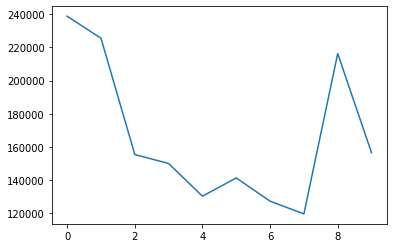

In [71]:
plt.plot(df.House_AgeBand, df.SalePrice)

In [72]:
housing.house_age.dtypes

dtype('float64')

In [73]:
#housing.loc[ housing['house_age'] <= 35, 'house_age'] = 'newer' 
housing.loc[(housing['house_age'] <= 35) | (housing['house_age'] >= 120), 'house_age'] = 1
housing.loc[(housing['house_age'] > 35) & (housing['house_age'] < 120), 'house_age'] = 0

In [74]:
housing.drop('House_AgeBand',axis=1,inplace=True)

In [75]:
#Create a new column as 'Remodel_yr' based on YearRemodAdd
housing['Remodel_yr'] = 2020 - housing.YearRemodAdd

In [76]:
#drop YearRemodAdd
housing.drop('YearRemodAdd',axis=1,inplace=True)

In [77]:
#create a new column Total_basement_area based on 3 other variables -
housing['Total_basement_area'] = housing['BsmtFinSF2'] + housing['BsmtFinSF1'] + housing['BsmtUnfSF']

In [78]:
#drop the 3 variables -
housing.drop('BsmtFinSF2',axis=1,inplace=True)
housing.drop('BsmtFinSF1',axis=1,inplace=True)
housing.drop('BsmtUnfSF',axis=1,inplace=True)

In [79]:
#create a new column Total_porch_area based on 4 other variables -
housing['Total_porch_area'] = housing['OpenPorchSF'] + housing['EnclosedPorch'] + housing['3SsnPorch'] + housing['ScreenPorch'] 

In [80]:
#drop the 4 variables -
housing.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1,inplace=True)

In [81]:
#drop few variables-
housing.drop(['BedroomAbvGr','KitchenAbvGr'],axis=1,inplace=True)

In [82]:
#create a new column Total_bathrooms based on other variables -
housing['Total_bathrooms'] = housing['BsmtFullBath'] + housing['BsmtHalfBath'] + housing['FullBath'] + housing['HalfBath']

In [83]:
#drop the variables -
housing.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)

In [84]:
#drop YrSold
housing.drop('YrSold',axis=1,inplace=True)

In [85]:
# all numeric (float and int) variables in the dataset
house_numeric = housing.select_dtypes(exclude='object')
house_numeric.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LandSlope,Condition1,BldgType,OverallQual,OverallCond,RoofStyle,MasVnrType,MasVnrArea,BsmtExposure,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleCondition,SalePrice,garage_age,house_age,Remodel_yr,Total_basement_area,Total_porch_area,Total_bathrooms
0,1,65.0,8450,1,1,1,1,1,7,5,1,1,196.0,0,856,1,1,856,854,0,1710,1,8,1,0,1,2,548,1,0,0,0,2,1,208500,17.0,1.0,17,856,61,4
1,1,80.0,9600,1,1,1,0,1,6,8,1,0,0.0,1,1262,1,1,1262,0,0,1262,0,6,1,1,1,2,460,1,298,0,0,5,1,181500,44.0,0.0,44,1262,0,3
2,1,68.0,11250,0,1,1,1,1,7,5,1,1,162.0,1,920,1,1,920,866,0,1786,1,6,1,1,1,2,608,1,0,0,0,9,1,223500,19.0,1.0,18,920,42,4
3,1,60.0,9550,0,1,1,1,1,7,5,1,0,0.0,0,756,1,1,961,756,0,1717,1,7,1,1,0,3,642,1,0,0,0,2,0,140000,22.0,0.0,50,756,307,2
4,1,84.0,14260,0,1,1,1,1,8,5,1,1,350.0,1,1145,1,1,1145,1053,0,2198,1,9,1,1,1,3,836,1,192,0,0,12,1,250000,20.0,1.0,20,1145,84,4


In [86]:
housing.shape

(1459, 52)

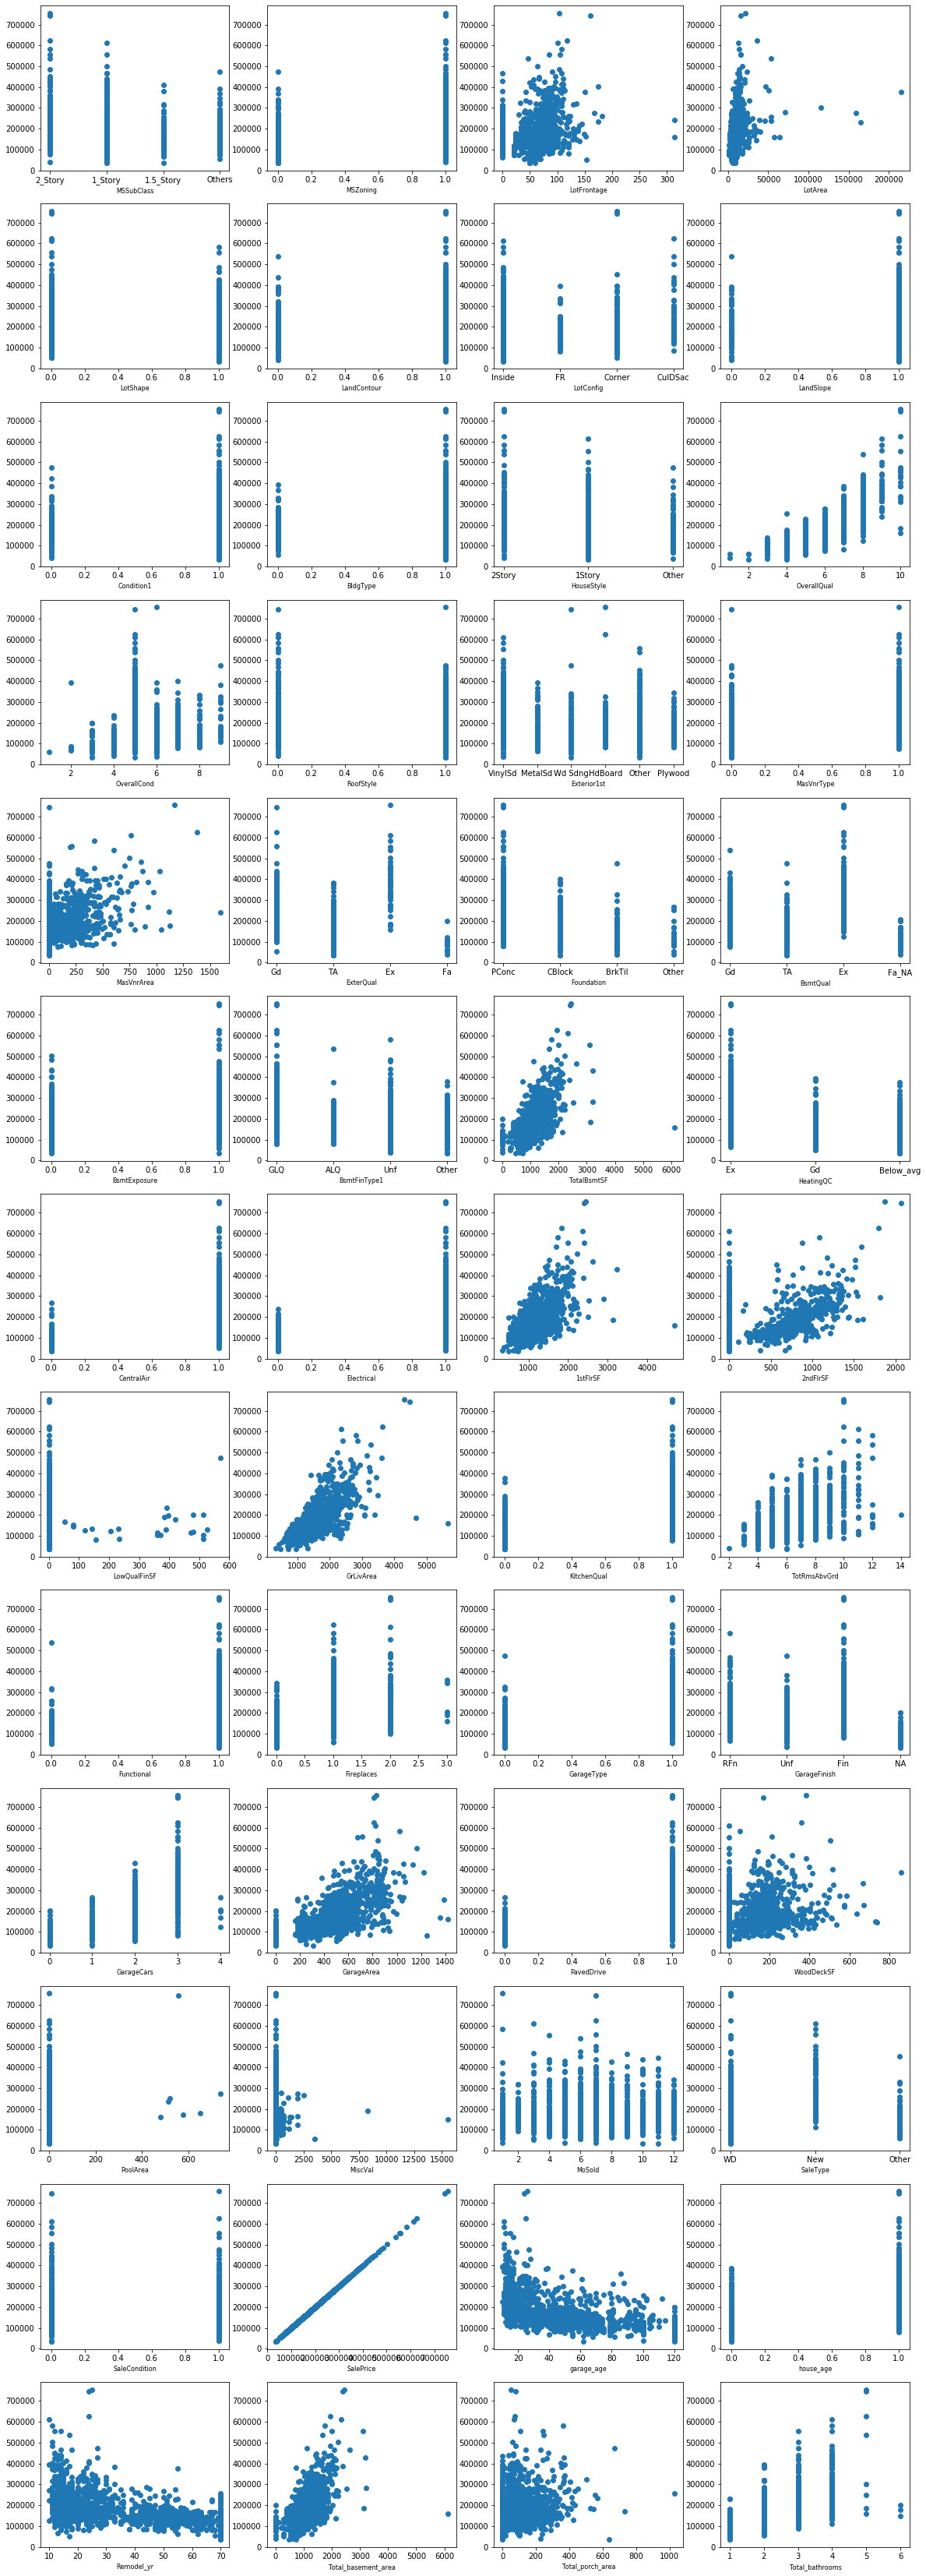

In [87]:
#Plot all the variables against SalePrice -
house_cols = list(housing.columns)
plt.figure(figsize=(20, 60))
for i,v in enumerate(house_cols):
    plt.subplot(13,4,i+1)
    plt.scatter(x = housing[v], y = housing['SalePrice'])
    plt.xlabel(v, fontsize = 8)                         

In [88]:
# correlation matrix
cor = house_numeric.corr()
cor

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LandSlope,Condition1,BldgType,OverallQual,OverallCond,RoofStyle,MasVnrType,MasVnrArea,BsmtExposure,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleCondition,SalePrice,garage_age,house_age,Remodel_yr,Total_basement_area,Total_porch_area,Total_bathrooms
MSZoning,1.000000,0.122316,0.204112,-0.269112,-0.003083,-0.041161,0.017765,0.285848,0.127294,-0.069498,-0.115917,0.162560,0.092691,0.126898,0.258150,0.203161,0.141010,0.305252,-0.099510,-0.095113,0.133032,0.097732,0.145425,0.018730,0.227894,0.358991,0.175078,0.169736,0.229490,0.167733,0.035619,0.016613,-0.003256,0.045939,0.245148,-0.163031,0.042583,-0.073876,0.258150,-0.073461,0.205487
LotFrontage,0.122316,1.000000,0.100770,0.153579,-0.039096,0.021870,-0.046998,0.200182,0.176853,-0.053308,-0.123646,0.029659,0.105202,0.062434,0.238950,-0.011764,0.009650,0.245613,0.042354,0.050022,0.220436,0.088565,0.221328,0.010430,0.044324,0.085507,0.165150,0.201599,0.016376,-0.016795,0.114135,-0.059583,0.019094,-0.134277,0.209692,-0.044539,0.107810,-0.078396,0.238950,0.078742,0.063450
LotArea,0.204112,0.100770,1.000000,-0.216114,-0.256835,-0.310705,-0.024935,0.163589,0.105786,-0.005665,-0.111856,0.030510,0.103302,0.173992,0.260962,0.049770,0.046339,0.299533,0.051030,0.004773,0.263109,0.042169,0.190037,-0.036034,0.271398,0.146943,0.154893,0.180392,0.010447,0.171701,0.077669,0.038063,0.001179,0.005737,0.263837,-0.024591,-0.020323,-0.013852,0.260962,0.071282,0.184464
LotShape,-0.269112,0.153579,-0.216114,1.000000,0.142614,0.103680,-0.009668,-0.149644,-0.199003,0.020476,0.020736,-0.088110,-0.104461,-0.164518,-0.188414,-0.114345,-0.105883,-0.182876,-0.071373,0.017550,-0.192149,-0.173323,-0.128766,-0.026282,-0.202624,-0.227011,-0.193513,-0.169665,-0.119081,-0.170920,-0.028850,-0.039354,-0.032245,-0.003975,-0.267639,0.204088,-0.176962,0.166089,-0.188414,-0.043381,-0.218492
LandContour,-0.003083,-0.039096,-0.256835,0.142614,1.000000,0.533628,0.010366,-0.021430,0.017860,-0.022814,0.035169,0.087904,0.045228,-0.131355,-0.026356,0.076127,0.066593,-0.061799,-0.014277,-0.065524,-0.063369,0.027010,-0.031885,0.033929,-0.075856,0.080198,0.009927,0.008528,0.121476,-0.044499,-0.003867,0.019482,-0.033406,0.036817,-0.027507,-0.103174,0.080363,-0.067094,-0.026356,-0.007198,0.019958
LandSlope,-0.041161,0.021870,-0.310705,0.103680,0.533628,1.000000,-0.014992,-0.039702,0.063475,-0.016683,0.043831,0.052397,0.020496,-0.188715,-0.021454,0.011376,0.014341,-0.061454,0.001164,-0.021795,-0.046244,0.009896,0.025051,0.104355,-0.100002,0.033527,-0.000721,-0.006180,0.028664,-0.092672,0.016331,0.008232,-0.004305,-0.007992,-0.051090,-0.061711,0.081594,-0.056892,-0.021454,-0.012479,-0.050949
Condition1,0.017765,-0.046998,-0.024935,-0.009668,0.010366,-0.014992,1.000000,-0.053214,0.099467,-0.083913,0.001309,0.071519,0.038515,0.073779,0.052496,0.064435,0.084481,-0.004706,-0.055817,-0.063909,-0.055737,0.123387,-0.086446,-0.005584,-0.007153,0.117685,0.059716,0.033734,0.105541,0.040339,-0.047560,-0.029509,0.034326,-0.015135,0.113022,-0.137222,0.159986,-0.132595,0.052496,-0.071972,0.036910
BldgType,0.285848,0.200182,0.163589,-0.149644,-0.021430,-0.039702,-0.053214,1.000000,0.036124,0.154819,-0.069217,-0.080194,-0.021719,-0.023163,0.086183,0.085221,-0.023529,0.073613,0.057329,0.015766,0.103213,0.028450,0.118520,-0.025241,0.132605,0.112158,0.039761,0.096145,-0.004977,0.043318,0.030490,-0.011759,0.028366,0.023611,0.137545,0.035548,-0.071253,0.026236,0.086183,0.131651,-0.059514
OverallQual,0.127294,0.176853,0.105786,-0.199003,0.017860,0.063475,0.099467,0.036124,1.000000,-0.092243,-0.159600,0.389239,0.407075,0.251618,0.537523,0.272248,0.259480,0.475933,0.295969,-0.030502,0.593021,0.618250,0.427720,0.174617,0.396455,0.468040,0.600991,0.561980,0.227348,0.239000,0.065143,-0.031461,0.070570,-0.143069,0.791069,-0.572603,0.644170,-0.551605,0.53752

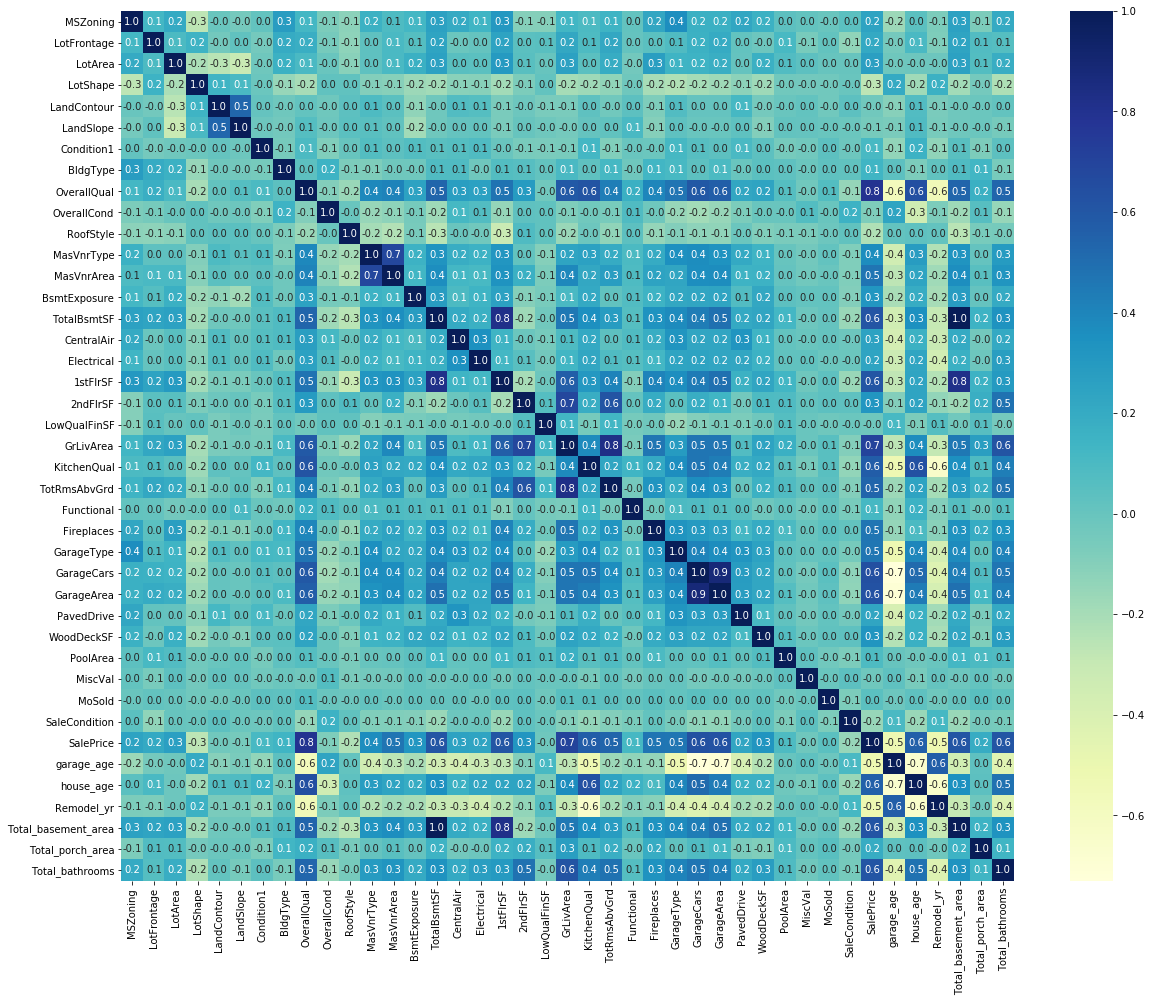

In [89]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", fmt='.1f',annot=True)
plt.show()

In [90]:
#drop highly correlated variables -
housing.drop(['GarageCars','garage_age','TotRmsAbvGrd','1stFlrSF','LowQualFinSF'],axis=1,inplace=True)
housing.drop(['2ndFlrSF','Remodel_yr'],axis=1,inplace=True)

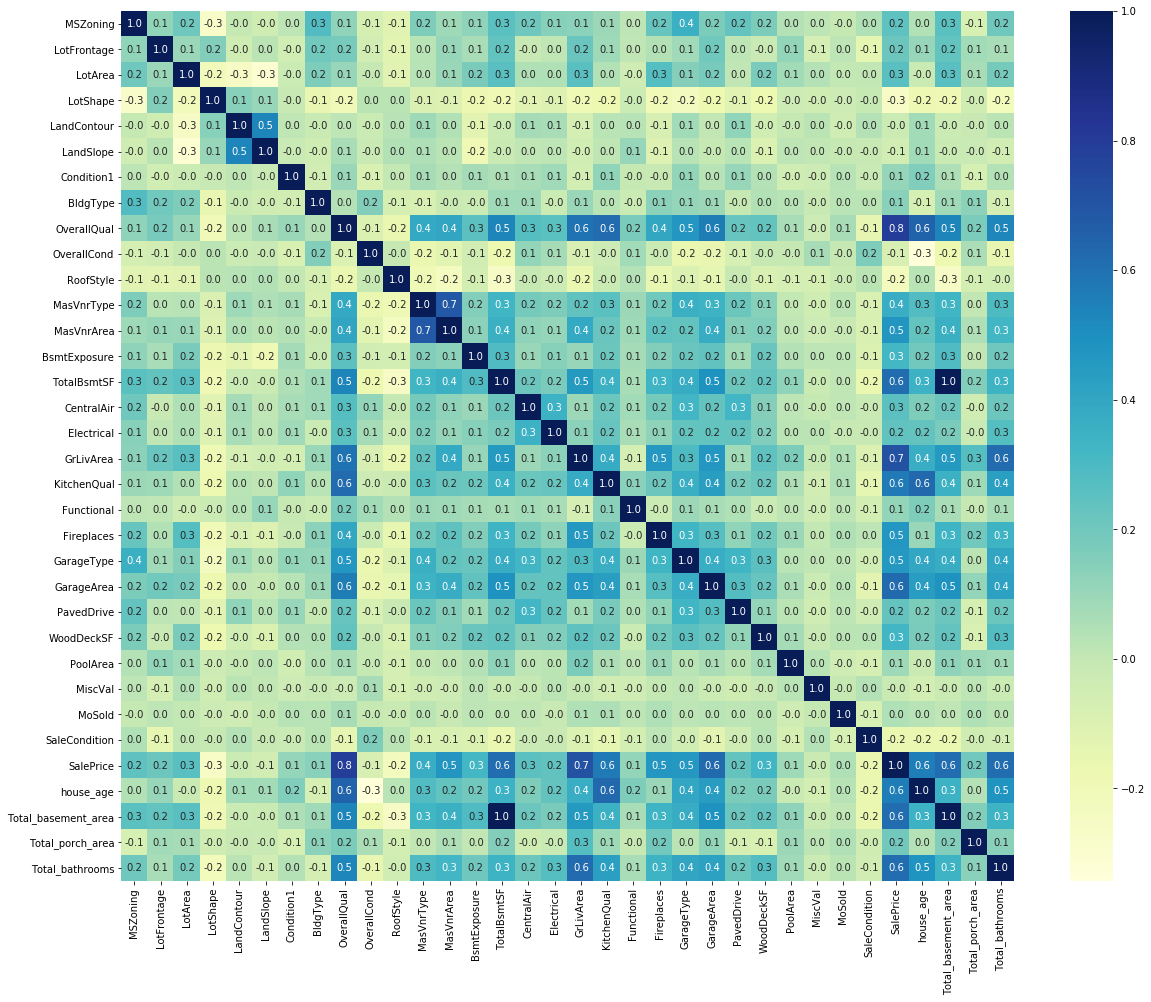

In [91]:
house_numeric = housing.select_dtypes(include=['float64', 'int64'])
cor = house_numeric.corr()
# plotting correlations on a heatmap
plt.figure(figsize=(20,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", fmt='.1f',annot=True)
plt.show()

In [92]:
housing.shape

(1459, 45)

## 3. Data Preparation

In [93]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,house_age,Total_basement_area,Total_porch_area,Total_bathrooms
0,2_Story,1,65.0,8450,1,1,Inside,1,1,1,2Story,7,5,1,VinylSd,1,196.0,Gd,PConc,Gd,0,GLQ,856,Ex,1,1,1710,1,1,0,1,RFn,548,1,0,0,0,2,WD,1,208500,1.0,856,61,4
1,1_Story,1,80.0,9600,1,1,FR,1,0,1,1Story,6,8,1,MetalSd,0,0.0,TA,CBlock,Gd,1,ALQ,1262,Ex,1,1,1262,0,1,1,1,RFn,460,1,298,0,0,5,WD,1,181500,0.0,1262,0,3
2,2_Story,1,68.0,11250,0,1,Inside,1,1,1,2Story,7,5,1,VinylSd,1,162.0,Gd,PConc,Gd,1,GLQ,920,Ex,1,1,1786,1,1,1,1,RFn,608,1,0,0,0,9,WD,1,223500,1.0,920,42,4
3,2_Story,1,60.0,9550,0,1,Corner,1,1,1,2Story,7,5,1,Wd Sdng,0,0.0,TA,BrkTil,TA,0,ALQ,756,Gd,1,1,1717,1,1,1,0,Unf,642,1,0,0,0,2,WD,0,140000,0.0,756,307,2
4,2_Story,1,84.0,14260,0,1,FR,1,1,1,2Story,8,5,1,VinylSd,1,350.0,Gd,PConc,Gd,1,GLQ,1145,Ex,1,1,2198,1,1,1,1,RFn,836,1,192,0,0,12,WD,1,250000,1.0,1145,84,4


In [94]:
house_object = housing.select_dtypes(include='object')

In [95]:
house_object.shape

(1459, 11)

In [96]:
housing_new = housing

In [97]:
#var = ['MSSubClass','LotConfig','HouseStyle','Exterior1st','ExterQual','Foundation',
#       'BsmtQual','BsmtFinType1','HeatingQC','GarageFinish','SaleType']

In [98]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

ml = pd.get_dummies(housing_new['MSSubClass'], prefix='MSSubClass')
ml1 = ml.drop(['MSSubClass_Others'], 1)
housing_new = pd.concat([housing_new,ml1], axis=1)

os = pd.get_dummies(housing_new['LotConfig'], prefix='LotConfig')
os1 = os.drop(['LotConfig_FR'], 1)
housing_new = pd.concat([housing_new,os1], axis=1)

ob = pd.get_dummies(housing_new['HouseStyle'], prefix='HouseStyle')
ob1 = ob.drop(['HouseStyle_Other'], 1)
housing_new = pd.concat([housing_new,ob1], axis=1)

dp = pd.get_dummies(housing_new['Exterior1st'], prefix='Exterior1st')
dp1 = dp.drop(['Exterior1st_Other'], 1)
housing_new = pd.concat([housing_new,dp1], axis=1)

ts = pd.get_dummies(housing_new['ExterQual'], prefix='ExterQual')
ts1 = ts.drop(['ExterQual_Fa'], 1)
housing_new = pd.concat([housing_new,ts1], axis=1)

st =pd.get_dummies(housing_new['Foundation'], prefix='Foundation')
st1 = st.drop(['Foundation_Other'], 1)
housing_new = pd.concat([housing_new,st1], axis=1)

sm = pd.get_dummies(housing_new['BsmtQual'], prefix='BsmtQual')
sm1 = sm.drop(['BsmtQual_Fa_NA'], 1)
housing_new = pd.concat([housing_new,sm1], axis=1)

bs = pd.get_dummies(housing_new['BsmtFinType1'], prefix='BsmtFinType1')
bs1 = bs.drop(['BsmtFinType1_Other'], 1)
housing_new = pd.concat([housing_new,bs1], axis=1)

hq = pd.get_dummies(housing_new['HeatingQC'], prefix='HeatingQC')
hq1 = hq.drop(['HeatingQC_Below_avg'], 1)
housing_new = pd.concat([housing_new,hq1], axis=1)

gf = pd.get_dummies(housing_new['GarageFinish'], prefix='GarageFinish')
gf1 = gf.drop(['GarageFinish_NA'], 1)
housing_new = pd.concat([housing_new,gf1], axis=1)

st = pd.get_dummies(housing_new['SaleType'], prefix='SaleType')
st1 = st.drop(['SaleType_Other'], 1)
housing_new = pd.concat([housing_new,st1], axis=1)

In [99]:
# drop categorical variables 
housing_new = housing_new.drop(list(house_object.columns), axis=1)

In [100]:
housing_new.shape

(1459, 66)

#### Remove outliers

In [101]:
#arrange correlation in ascending to see what 
cor = housing_new.corr()
cor['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
OverallQual             0.791069
GrLivArea               0.708618
GarageArea              0.623423
TotalBsmtSF             0.613905
Total_basement_area     0.613905
Total_bathrooms         0.613162
KitchenQual             0.571367
house_age               0.556267
BsmtQual_Ex             0.553093
Foundation_PConc        0.498083
MasVnrArea              0.472606
Fireplaces              0.466968
GarageType              0.462563
ExterQual_Gd            0.452466
ExterQual_Ex            0.451152
BsmtFinType1_GLQ        0.434588
HeatingQC_Ex            0.434583
GarageFinish_Fin        0.420341
MasVnrType              0.367450
SaleType_New            0.357489
MSSubClass_2_Story      0.336463
WoodDeckSF              0.324422
BsmtExposure            0.319965
Exterior1st_VinylSd     0.305361
LotArea                 0.263837
CentralAir              0.251367
MSZoning                0.245148
HouseStyle_2Story       0.242842
Electrical              0.242403
BsmtQual_G

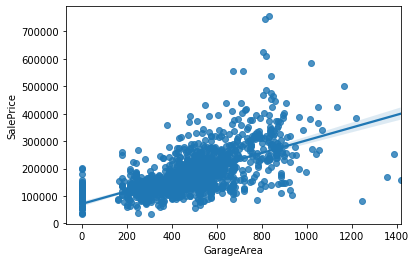

In [102]:
fig = plt.figure()
sns.regplot(x=housing_new.GarageArea, y=housing_new.SalePrice, fit_reg=True)

In [103]:
housing_new = housing_new.drop(housing_new[(housing_new.GarageArea <= 1000) & (housing_new.GarageArea >=600) &  (housing_new.SalePrice>500000)].index)

In [104]:
housing_new = housing_new.drop(housing_new[(housing_new.GarageArea>1200) & (housing_new.SalePrice<150000)].index)

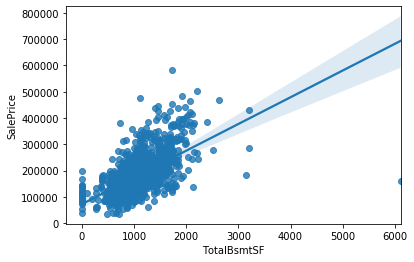

In [105]:
fig = plt.figure()
#plt.scatter(x=housing.OverallQual, y=housing.SalePrice)
sns.regplot(x=housing_new.TotalBsmtSF, y=housing_new.SalePrice, fit_reg=True)

In [106]:
housing_new = housing_new.drop(housing_new[(housing_new.TotalBsmtSF> 5000)].index)

In [107]:
housing_new = housing_new.drop(housing_new[(housing_new.SalePrice > 550000)].index)

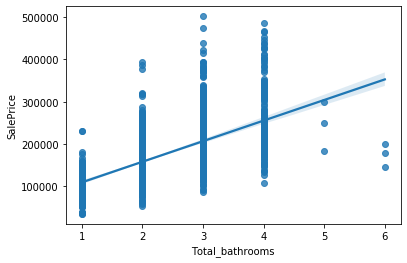

In [108]:
fig = plt.figure()
#plt.scatter(x=housing.OverallQual, y=housing.SalePrice)
sns.regplot(x=housing_new.Total_bathrooms, y=housing_new.SalePrice, fit_reg=True)

In [109]:
housing_new = housing_new.drop(housing_new[(housing_new.Total_bathrooms > 5)].index)

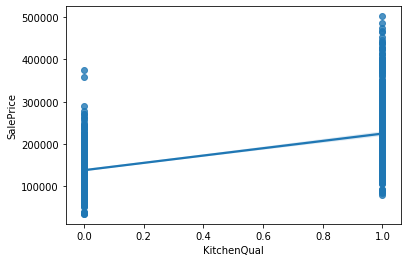

In [110]:
fig = plt.figure()
#plt.scatter(x=housing.OverallQual, y=housing.SalePrice)
sns.regplot(x=housing_new.KitchenQual, y=housing_new.SalePrice, fit_reg=True)

In [111]:
housing_new = housing_new.drop(housing_new[(housing_new.KitchenQual == 0) & (housing_new.SalePrice > 340000)].index)

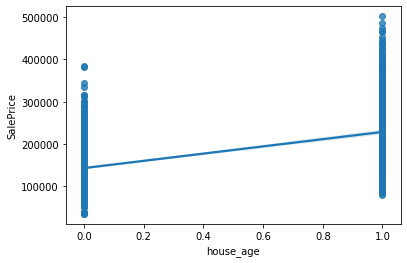

In [112]:
fig = plt.figure()
#plt.scatter(x=housing.OverallQual, y=housing.SalePrice)
sns.regplot(x=housing_new.house_age, y=housing_new.SalePrice, fit_reg=True)

In [113]:
housing_new = housing_new.drop(housing_new[(housing_new.house_age >= 120) & (housing_new.SalePrice >= 250000)].index)

In [114]:
housing_new = housing_new.drop(housing_new[(housing_new.house_age >= 80) & (housing_new.SalePrice >= 350000)].index)

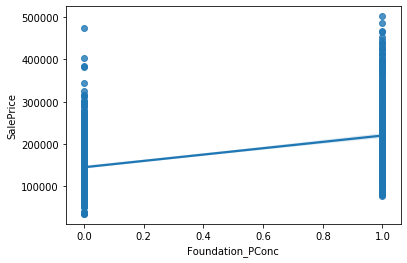

In [115]:
fig = plt.figure()
#plt.scatter(x=housing.OverallQual, y=housing.SalePrice)
sns.regplot(x=housing_new.Foundation_PConc, y=housing_new.SalePrice, fit_reg=True)

In [116]:
housing_new = housing_new.drop(housing_new[(housing_new.Foundation_PConc == 0) & (housing_new.SalePrice >= 350000)].index)

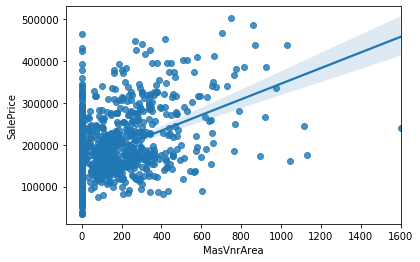

In [117]:
fig = plt.figure()
#plt.scatter(x=housing.OverallQual, y=housing.SalePrice)
sns.regplot(x=housing_new.MasVnrArea, y=housing_new.SalePrice, fit_reg=True)

In [118]:
housing_new = housing_new.drop(housing_new[(housing_new.MasVnrArea > 1400)].index)

In [119]:
housing_new = housing_new.drop(housing_new[(housing_new.MasVnrArea == 0) & (housing_new.SalePrice > 400000)].index)

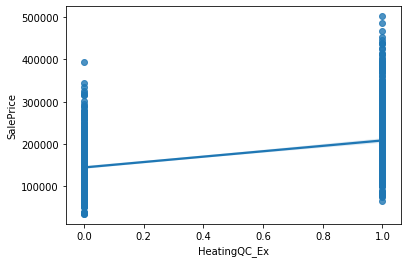

In [120]:
fig = plt.figure()
#plt.scatter(x=housing.OverallQual, y=housing.SalePrice)
sns.regplot(x=housing_new.HeatingQC_Ex, y=housing_new.SalePrice, fit_reg=True)

In [121]:
housing_new = housing_new.drop(housing_new[(housing_new.HeatingQC_Ex == 0) & (housing_new.SalePrice > 350000)].index)

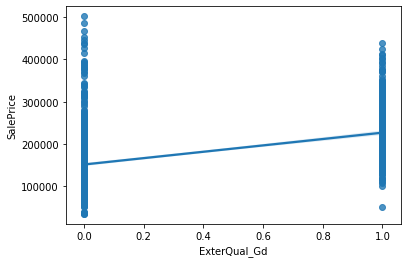

In [122]:
fig = plt.figure()
sns.regplot(x=housing_new.ExterQual_Gd, y=housing_new.SalePrice, fit_reg=True)

In [123]:
housing_new = housing_new.drop(housing_new[(housing_new.ExterQual_Gd == 1) & (housing_new.SalePrice < 100000)].index)

In [124]:
housing_new.shape

(1434, 66)

### Check the distribution of target

Text(0.5, 0, 'SalePrice')

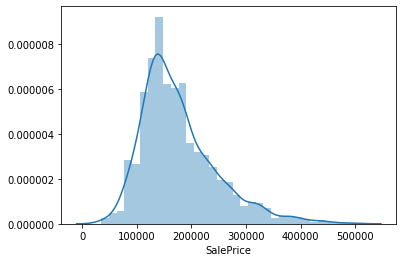

In [125]:
sns.distplot(housing_new['SalePrice'])
plt.xlabel('SalePrice')

In [126]:
#Convert target to log-scale to remove the skewness-
housing_new['SalePrice_log'] = np.log1p(housing_new.SalePrice)

Text(0.5, 0, 'SalePrice')

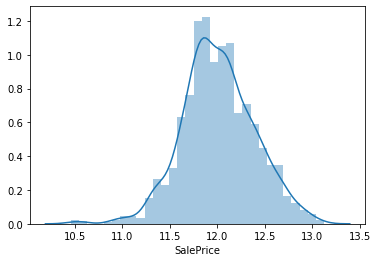

In [127]:
sns.distplot(housing_new['SalePrice_log'])
plt.xlabel('SalePrice')

## Step 4: Splitting the Data into Training and Testing Sets

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing_new, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(1003, 67)
(431, 67)


In [130]:
housing_new.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LandSlope,Condition1,BldgType,OverallQual,OverallCond,RoofStyle,MasVnrType,MasVnrArea,BsmtExposure,TotalBsmtSF,CentralAir,Electrical,GrLivArea,KitchenQual,Functional,Fireplaces,GarageType,GarageArea,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleCondition,SalePrice,house_age,Total_basement_area,Total_porch_area,Total_bathrooms,MSSubClass_1.5_Story,MSSubClass_1_Story,MSSubClass_2_Story,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,HouseStyle_1Story,HouseStyle_2Story,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_WD,SalePrice_log
0,1,65.0,8450,1,1,1,1,1,7,5,1,1,196.0,0,856,1,1,1710,1,1,0,1,548,1,0,0,0,2,1,208500,1.0,856,61,4,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,12.247699
1,1,80.0,9600,1,1,1,0,1,6,8,1,0,0.0,1,1262,1,1,1262,0,1,1,1,460,1,298,0,0,5,1,181500,0.0,1262,0,3,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,12.109016
2,1,68.0,11250,0,1,1,1,1,7,5,1,1,162.0,1,920,1,1,1786,1,1,1,1,608,1,0,0,0,9,1,223500,1.0,920,42,4,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,12.317171
3,1,60.0,9550,0,1,1,1,1,7,5,1,0,0.0,0,756,1,1,1717,1,1,1,0,642,1,0,0,0,2,0,140000,0.0,756,307,2,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,11.849405
4,1,84.0,14260,0,1,1,1,1,8,5,1,1,350.0,1,1145,1,1,2198,1,1,1,1,836,1,192,0,0,12,1,250000,1.0,1145,84,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,12.429220


### Dividing into X and Y sets for the model building

In [131]:
predictors = [x for x in df_train.columns if x not in ['SalePrice','SalePrice_log']]
X_train = df_train[predictors]
y_train = df_train['SalePrice_log']

In [132]:
X_train.shape

(1003, 65)

In [133]:
X_train.head()

,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LandSlope,Condition1,BldgType,OverallQual,OverallCond,RoofStyle,MasVnrType,MasVnrArea,BsmtExposure,TotalBsmtSF,CentralAir,Electrical,GrLivArea,KitchenQual,Functional,Fireplaces,GarageType,GarageArea,PavedDrive,WoodDeckSF,PoolArea,MiscVal,MoSold,SaleCondition,house_age,Total_basement_area,Total_porch_area,Total_bathrooms,MSSubClass_1.5_Story,MSSubClass_1_Story,MSSubClass_2_Story,LotConfig_Corner,LotConfig_CulDSac,LotConfig_Inside,HouseStyle_1Story,HouseStyle_2Story,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_WD
592,1,60.0,6600,1,1,1,1,1,5,8,1,0,0.0,0,816,1,1,816,0,1,0,0,816,1,0,0,0,6,1,0.0,816,0,2,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1
126,1,0.0,4928,0,1,1,1,0,6,5,1,0,0.0,0,1078,1,1,958,0,1,1,1,440,1,0,0,0,2,1,0.0,1078,205,2,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1
853,1,0.0,12095,0,1,1,1,1,6,6,1,1,115.0,1,1127,1,1,1445,0,1,1,1,645,1,180,0,0,8,1,0.0,1127,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
1315,1,85.0,11075,1,1,1,1,1,6,5,1,0,0.0,1,952,1,1,2112,0,1,2,1,576,1,280,0,0,6,1,0.0,952,0,3,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
148,1,63.0,7500,1,1,1,1,1,7,5,1,1,120.0,0,1080,1,1,1080,1,1,0,0,0,1,0,0,0,4,1,1.0,1080,0,2,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1


In [134]:
y_train.head()

592     11.835016
126     11.759793
853     11.970357
1315    12.239996
148     11.856522
Name: SalePrice_log, dtype: float64

In [135]:
predictors = [x for x in df_test.columns if x not in ['SalePrice','SalePrice_log']]
X_test = df_test[predictors]
y_test = df_test['SalePrice_log']

### Rescaling the Features

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler=StandardScaler()

In [138]:
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','TotalBsmtSF','GrLivArea','GarageArea','WoodDeckSF',
          'MoSold','Total_porch_area','Total_bathrooms','Total_basement_area']

In [139]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [140]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

## Step 5: Building a linear model

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [142]:
#this function will calculate adjusted r2 -
def calculate_adj_r2(r2,train):
    adj_r2 = (1 - (1 - r2) * ((train.shape[0] - 1) / 
          (train.shape[0] - train.shape[1] - 1)))
    return(adj_r2)

In [143]:
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# predict
r2 = lr.score(X_train,y_train)
print('R2: {}'.format(r2))
print('Adjusted R2: {}'.format(calculate_adj_r2(r2,X_train)))

R2: 0.8894396194810289
Adjusted R2: 0.881770009306287


In [144]:
r2 = lr.score(X_test,y_test)
print('R2: {}'.format(r2))
print('Adjusted R2: {}'.format(calculate_adj_r2(r2,X_train)))

R2: 0.9057720580578912
Adjusted R2: 0.8992354345507011


## RFE

In [145]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

In [146]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [147]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSZoning', True, 1),
 ('LotFrontage', False, 9),
 ('LotArea', True, 1),
 ('LotShape', True, 1),
 ('LandContour', False, 6),
 ('LandSlope', True, 1),
 ('Condition1', True, 1),
 ('BldgType', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('RoofStyle', False, 7),
 ('MasVnrType', False, 8),
 ('MasVnrArea', False, 15),
 ('BsmtExposure', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', True, 1),
 ('Electrical', True, 1),
 ('GrLivArea', True, 1),
 ('KitchenQual', True, 1),
 ('Functional', True, 1),
 ('Fireplaces', True, 1),
 ('GarageType', True, 1),
 ('GarageArea', True, 1),
 ('PavedDrive', True, 1),
 ('WoodDeckSF', True, 1),
 ('PoolArea', False, 14),
 ('MiscVal', False, 16),
 ('MoSold', False, 10),
 ('SaleCondition', True, 1),
 ('house_age', False, 3),
 ('Total_basement_area', True, 1),
 ('Total_porch_area', True, 1),
 ('Total_bathrooms', True, 1),
 ('MSSubClass_1.5_Story', False, 5),
 ('MSSubClass_1_Story', True, 1),
 ('MSSubClass_2_Story', True, 1),
 ('LotConfig_Co

In [148]:
col = X_train.columns[rfe.support_]
col

Index(['MSZoning', 'LotArea', 'LotShape', 'LandSlope', 'Condition1',
       'BldgType', 'OverallQual', 'OverallCond', 'BsmtExposure', 'TotalBsmtSF',
       'CentralAir', 'Electrical', 'GrLivArea', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'SaleCondition', 'Total_basement_area', 'Total_porch_area',
       'Total_bathrooms', 'MSSubClass_1_Story', 'MSSubClass_2_Story',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_Inside',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng', 'ExterQual_Ex',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtFinType1_ALQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Ex', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'SaleType_New', 'SaleType_WD'],
      dtype='object')

In [149]:
lr = LinearRegression()
lr.fit(X_train[col], y_train)

# predict
r2 = lr.score(X_train[col],y_train)
print('R2: {}'.format(r2))
print('Adjusted R2: {}'.format(calculate_adj_r2(r2,X_train[col])))

R2: 0.8882619370579613
Adjusted R2: 0.8823933413152072


In [150]:
r2 = lr.score(X_test[col],y_test)
print('R2: {}'.format(r2))
print('Adjusted R2: {}'.format(calculate_adj_r2(r2,X_train[col])))

R2: 0.90793084251141
Adjusted R2: 0.9030952775172614


### Lasso Regression

In [151]:
# list of alphas to tune
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, .1,1,2,3,4, 5, 10,20]}

In [152]:
lasso = Lasso(normalize=True)

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 10, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col], y_train) 

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.7s finished


GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 2, 3, 4, 5, 10, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [153]:
# examine the best model
print(model_cv.best_score_)
print(model_cv.best_params_)
print(model_cv.best_estimator_)

-0.09026459505901145
{'alpha': 1e-05}
Lasso(alpha=1e-05, normalize=True)


In [154]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.078799,0.024924,0.005732,0.003771,1e-15,{'alpha': 1e-15},-0.099375,-0.087821,-0.089926,-0.080050,-0.091902,-0.109864,-0.080987,-0.096847,-0.079288,-0.088369,-0.090443,0.009129,4,-0.083592,-0.085505,-0.085527,-0.086472,-0.084397,-0.081524,-0.086293,-0.084488,-0.086435,-0.085026,-0.084926,0.001452
1,0.068489,0.006165,0.006047,0.003251,1e-10,{'alpha': 1e-10},-0.099375,-0.087821,-0.089926,-0.080050,-0.091902,-0.109864,-0.080987,-0.096847,-0.079288,-0.088369,-0.090443,0.009129,3,-0.083592,-0.085505,-0.085527,-0.086472,-0.084397,-0.081524,-0.086293,-0.084488,-0.086435,-0.085026,-0.084926,0.001452
2,0.074907,0.006011,0.003988,0.003595,1e-08,{'alpha': 1e-08},-0.099375,-0.087821,-0.089926,-0.080051,-0.091902,-0.109864,-0.080987,-0.096846,-0.079287,-0.088369,-0.090443,0.009129,2,-0.083592,-0.085505,-0.085527,-0.086472,-0.084397,-0.081524,-0.086293,-0.084489,-0.086436,-0.085026,-0.084926,0.001452
3,0.015520,0.001899,0.004801,0.003920,1e-05,{'alpha': 1e-05},-0.099722,-0.087131,-0.089626,-0.080182,-0.091810,-0.110052,-0.080939,-0.096753,-0.078294,-0.088138,-0.090265,0.009339,1,-0.083578,-0.085704,-0.085695,-0.086511,-0.084575,-0.081602,-0.086409,-0.084522,-0.086532,-0.085186,-0.085031,0.001470
4,0.010345,0.003748,0.003201,0.003920,0.0001,{'alpha': 0.0001},-0.101520,-0.086955,-0.087958,-0.082355,-0.092906,-0.111239,-0.081211,-0.097889,-0.076542,-0.088737,-0.090731,0.009905,5,-0.084851,-0.086681,-0.086490,-0.087523,-0.085754,-0.082768,-0.087287,-0.085666,-0.087768,-0.086383,-0.086117,0.001405


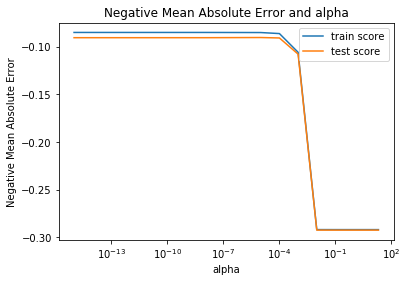

In [155]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [156]:
lasso_1 = model_cv.best_estimator_
#lasso_1 = Lasso(alpha=0.001)

In [157]:
lasso_1.fit(X_train[col], y_train)
r2 = lasso_1.score(X_train[col],y_train)
print('R2: {}'.format(r2))
print('Adjusted R2: {}'.format(calculate_adj_r2(r2,X_train[col])))

R2: 0.888124800197025
Adjusted R2: 0.8822490018880452


In [158]:
lasso_1.score(X_test[col],y_test)

0.9070894588928549

In [159]:
imp_df = pd.DataFrame({
    "Varname": X_train[col].columns,
    "Imp": lasso_1.coef_
})

In [160]:
imp_df.shape

(50, 2)

In [161]:
imp_df = imp_df[imp_df.Imp != 0]
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
48,SaleType_New,0.122894
12,GrLivArea,0.093971
6,OverallQual,0.085727
20,SaleCondition,0.079910
39,BsmtQual_Ex,0.071524
14,Functional,0.067351
0,MSZoning,0.067295
10,CentralAir,0.056943
4,Condition1,0.052633
27,LotConfig_CulDSac,0.052474


In [162]:
imp_df.shape

(48, 2)

In [163]:
imp_cols = list(imp_df.Varname)

In [164]:
X_train_imp = X_train[[c for c in X_train.columns if c in imp_cols]]

In [165]:
X_train_imp.shape

(1003, 48)

In [166]:
X_test_imp = X_test[[c for c in X_test.columns if c in imp_cols]]

In [168]:
X_test_imp.shape

(431, 48)

### Ridge Regression

In [169]:
X_train_imp.head()

,MSZoning,LotArea,LotShape,LandSlope,Condition1,BldgType,OverallQual,OverallCond,BsmtExposure,TotalBsmtSF,CentralAir,Electrical,GrLivArea,KitchenQual,Functional,Fireplaces,GarageType,GarageArea,PavedDrive,WoodDeckSF,SaleCondition,Total_basement_area,Total_porch_area,Total_bathrooms,MSSubClass_1_Story,MSSubClass_2_Story,LotConfig_Corner,LotConfig_CulDSac,HouseStyle_1Story,HouseStyle_2Story,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Wd Sdng,ExterQual_Ex,ExterQual_Gd,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtFinType1_ALQ,BsmtFinType1_GLQ,BsmtFinType1_Unf,HeatingQC_Ex,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_WD
592,1,-0.460998,1,1,1,1,-0.775006,2.116931,0,-0.566808,1,1,-1.411498,0,1,0,0,1.717040,1,-0.743886,1,-0.566808,-0.813613,-0.428419,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1
126,1,-0.678407,0,1,1,0,-0.015894,-0.517414,0,0.084507,1,1,-1.112925,0,1,1,1,-0.118355,1,-0.743886,1,0.084507,1.079184,-0.428419,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1
853,1,0.253513,0,1,1,1,-0.015894,0.360701,1,0.206318,1,1,-0.088946,0,1,1,1,0.882326,1,0.727359,1,0.206318,-0.813613,-0.428419,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1315,1,0.120883,1,1,1,1,-0.015894,-0.517414,1,-0.228721,1,1,1.313507,0,1,2,1,0.545511,1,1.544717,1,-0.228721,-0.813613,0.690602,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
148,1,-0.343972,1,1,1,1,0.743218,-0.517414,0,0.089479,1,1,-0.856405,1,1,0,0,-2.266157,1,-0.743886,1,0.089479,-0.813613,-0.428419,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1


In [170]:
params = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, .1,1,2,3,4, 5, 10,20]}

In [171]:
ridge = Ridge(normalize=True)

# cross validation
model_cv1 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 10, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train_imp, y_train) 

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.8s finished


GridSearchCV(cv=10, estimator=Ridge(normalize=True),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 2, 3, 4, 5, 10, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [172]:
# examine the best model
print(model_cv1.best_score_)
print(model_cv1.best_params_)
print(model_cv1.best_estimator_)

-0.09011257671378142
{'alpha': 0.01}
Ridge(alpha=0.01, normalize=True)


In [173]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.036493,0.088142,0.003675,0.002654,1e-15,{'alpha': 1e-15},-0.099432,-0.087335,-0.089849,-0.079948,-0.091562,-0.109279,-0.081162,-0.096641,-0.078790,-0.088059,-0.090206,0.009069,7,-0.083411,-0.085664,-0.085651,-0.086459,-0.084454,-0.081690,-0.08632,-0.084460,-0.086440,-0.085094,-0.084964,0.001445
1,0.008158,0.001486,0.005140,0.004073,1e-10,{'alpha': 1e-10},-0.099432,-0.087335,-0.089849,-0.079948,-0.091562,-0.109279,-0.081162,-0.096641,-0.078790,-0.088059,-0.090206,0.009069,6,-0.083411,-0.085664,-0.085651,-0.086459,-0.084454,-0.081690,-0.08632,-0.084460,-0.086440,-0.085094,-0.084964,0.001445
2,0.009311,0.002582,0.004204,0.003842,1e-08,{'alpha': 1e-08},-0.099432,-0.087335,-0.089849,-0.079948,-0.091562,-0.109279,-0.081162,-0.096641,-0.078790,-0.088059,-0.090206,0.009069,5,-0.083411,-0.085664,-0.085651,-0.086459,-0.084454,-0.081690,-0.08632,-0.084460,-0.086440,-0.085094,-0.084964,0.001445
3,0.004715,0.003480,0.004320,0.003612,1e-05,{'alpha': 1e-05},-0.099432,-0.087334,-0.089849,-0.079948,-0.091562,-0.109279,-0.081162,-0.096641,-0.078790,-0.088059,-0.090206,0.009069,4,-0.083411,-0.085664,-0.085651,-0.086459,-0.084454,-0.081690,-0.08632,-0.084460,-0.086440,-0.085094,-0.084964,0.001445
4,0.004858,0.004051,0.003522,0.003570,0.0001,{'alpha': 0.0001},-0.099432,-0.087331,-0.089847,-0.079951,-0.091562,-0.109277,-0.081160,-0.096640,-0.078785,-0.088058,-0.090204,0.009069,3,-0.083411,-0.085665,-0.085651,-0.086459,-0.084454,-0.081689,-0.08632,-0.084461,-0.086441,-0.085094,-0.084964,0.001445


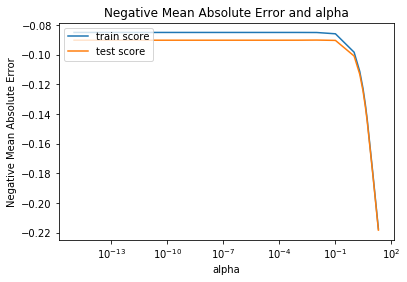

In [174]:
# plotting mean test and train scoes with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [175]:
ridge_1 = model_cv1.best_estimator_

In [176]:
ridge_1.fit(X_train_imp, y_train)
r2 = ridge_1.score(X_train_imp,y_train)
print('R2: {}'.format(r2))
print('Adjusted R2: {}'.format(calculate_adj_r2(r2,X_train_imp)))

R2: 0.888177798257268
Adjusted R2: 0.8825515239557469


In [177]:
ridge_1.score(X_test_imp,y_test)

0.9074978145065637

In [178]:
y_train_pred = ridge_1.predict(X_train_imp)

In [179]:
#calculate residuals -
res = y_train_pred - y_train

Text(0.5, 0, 'Errors')

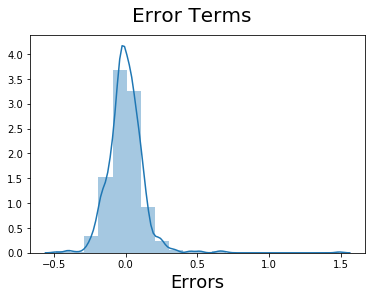

In [180]:
# Plot the histogram of the residuals on train dataset
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [386]:
#get the coefficients wihh corr. features -
df_rifge = pd.DataFrame(list(zip(X_test_imp, ridge_1.coef_)))
df_rifge.columns = ['Feature','Coefficient']
df_rifge = df_rifge.sort_values(by='Coefficient', ascending=False)
df_rifge

,Feature,Coefficient
46,SaleType_New,0.121373
12,GrLivArea,0.093005
6,OverallQual,0.083729
20,SaleCondition,0.080278
37,BsmtQual_Ex,0.074484
14,Functional,0.067649
0,MSZoning,0.066812
10,CentralAir,0.057022
27,LotConfig_CulDSac,0.053487
4,Condition1,0.052714


### my prac

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve

In [182]:
from sklearn.model_selection import validation_curve

In [184]:
#param_range = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, .1,1,2,3,4, 5, 10,20]}

In [246]:
np.logspace(-7, 3, 6)

array([1.e-07, 1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03])

In [258]:
#param_range = np.logspace(-7, 3, 3)
param_range = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, .1,1,2,3,4, 5, 10,20]
param_range = np.array(param_range)
param_range

array([1.e-15, 1.e-10, 1.e-08, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01,
       1.e+00, 2.e+00, 3.e+00, 4.e+00, 5.e+00, 1.e+01, 2.e+01])

In [248]:
train_scores, test_scores = validation_curve(Ridge(), X_train_imp, y_train, param_name='alpha',
                                             param_range=param_range, scoring="r2",cv=5)

In [249]:
np.mean(train_scores, axis=1)

array([0.88978966, 0.88978966, 0.88978966, 0.88978966, 0.88978966,
       0.88978966, 0.88978965, 0.88978943, 0.88976933, 0.88971733,
       0.88964294, 0.88955213, 0.88944904, 0.88883097, 0.88745551])

In [250]:
train_scores

array([[0.88473205, 0.88568916, 0.91044107, 0.88871753, 0.87936846],
       [0.88473205, 0.88568916, 0.91044107, 0.88871753, 0.87936846],
       [0.88473205, 0.88568916, 0.91044107, 0.88871753, 0.87936846],
       [0.88473205, 0.88568916, 0.91044107, 0.88871753, 0.87936846],
       [0.88473205, 0.88568916, 0.91044107, 0.88871753, 0.87936846],
       [0.88473205, 0.88568916, 0.91044107, 0.88871753, 0.87936846],
       [0.88473205, 0.88568916, 0.91044107, 0.88871753, 0.87936846],
       [0.88473185, 0.88568894, 0.9104408 , 0.88871727, 0.87936827],
       [0.88471424, 0.88566914, 0.91041737, 0.88869496, 0.87935092],
       [0.88466805, 0.88561683, 0.91035738, 0.88863859, 0.87930581],
       [0.88460126, 0.8855409 , 0.91027273, 0.8885591 , 0.87924073],
       [0.88451909, 0.88544733, 0.91017079, 0.88846286, 0.87916061],
       [0.88442526, 0.8853404 , 0.91005651, 0.88835416, 0.87906885],
       [0.88385705, 0.88469292, 0.90939186, 0.88770726, 0.87850573],
       [0.88258049, 0.88324243, 0.

In [251]:
test_scores

array([[0.89064156, 0.88911859, 0.78837088, 0.875628  , 0.91752419],
       [0.89064156, 0.88911859, 0.78837088, 0.875628  , 0.91752419],
       [0.89064156, 0.88911859, 0.78837088, 0.875628  , 0.91752419],
       [0.89064156, 0.8891186 , 0.78837088, 0.87562801, 0.91752419],
       [0.89064157, 0.88911865, 0.78837095, 0.87562806, 0.91752421],
       [0.89064169, 0.8891192 , 0.78837166, 0.87562859, 0.9175244 ],
       [0.89064286, 0.8891247 , 0.78837874, 0.87563383, 0.91752623],
       [0.89065419, 0.88917915, 0.78844846, 0.87568546, 0.91754425],
       [0.89073758, 0.88967934, 0.78905579, 0.87613636, 0.91769695],
       [0.89077891, 0.8901551 , 0.78957782, 0.87653278, 0.91782289],
       [0.89078018, 0.89056372, 0.78998205, 0.87685211, 0.91791695],
       [0.89075119, 0.890918  , 0.79029821, 0.87711423, 0.91798769],
       [0.89069888, 0.89122749, 0.79054681, 0.8773319 , 0.91804054],
       [0.89022759, 0.89231172, 0.79117537, 0.87799561, 0.9181366 ],
       [0.88889905, 0.89328219, 0.

In [252]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

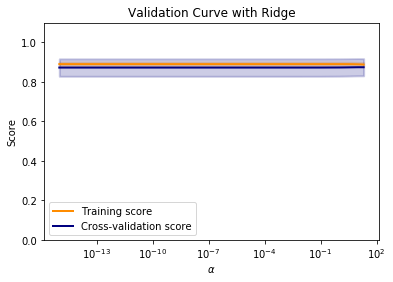

In [259]:
plt.title("Validation Curve with Ridge")
plt.xlabel(r"$\alpha$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.xscale('log')
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
#plt.legend(loc="best")
plt.legend(loc='lower left')
plt.show()

## Elastic Net

In [387]:
elasticnet = ElasticNet(normalize=True)

# cross validation
model_cv3 = GridSearchCV(estimator = elasticnet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 10, 
                        return_train_score=True,
                        verbose = 1)            

model_cv3.fit(X_train_imp, y_train) 
#model_cv2.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    4.9s finished


GridSearchCV(cv=10, estimator=ElasticNet(normalize=True),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 2, 3, 4, 5, 10, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [388]:
# examine the best model
print(model_cv3.best_score_)
print(model_cv3.best_params_)
print(model_cv3.best_estimator_)

-0.0901309867009529
{'alpha': 1e-05}
ElasticNet(alpha=1e-05, normalize=True)


In [389]:
cv_results3 = pd.DataFrame(model_cv3.cv_results_)
cv_results3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.069453,0.015501,0.006444,0.002176,1e-15,{'alpha': 1e-15},-0.099432,-0.087335,-0.089849,-0.079948,-0.091562,-0.109279,-0.081162,-0.096641,-0.078790,-0.088059,-0.090206,0.009069,4,-0.083411,-0.085664,-0.085651,-0.086459,-0.084454,-0.081690,-0.086320,-0.084460,-0.086440,-0.085094,-0.084964,0.001445
1,0.068112,0.006541,0.004260,0.004304,1e-10,{'alpha': 1e-10},-0.099432,-0.087334,-0.089849,-0.079948,-0.091562,-0.109279,-0.081162,-0.096641,-0.078790,-0.088059,-0.090206,0.009069,3,-0.083411,-0.085664,-0.085651,-0.086459,-0.084454,-0.081690,-0.086320,-0.084460,-0.086440,-0.085094,-0.084964,0.001445
2,0.068759,0.004061,0.004009,0.004009,1e-08,{'alpha': 1e-08},-0.099432,-0.087334,-0.089849,-0.079948,-0.091562,-0.109279,-0.081161,-0.096641,-0.078790,-0.088059,-0.090206,0.009069,2,-0.083411,-0.085664,-0.085651,-0.086459,-0.084454,-0.081690,-0.086320,-0.084460,-0.086440,-0.085094,-0.084964,0.001445
3,0.031877,0.005712,0.004772,0.003429,1e-05,{'alpha': 1e-05},-0.099590,-0.087026,-0.089648,-0.080216,-0.091658,-0.109229,-0.080995,-0.096652,-0.078236,-0.088060,-0.090131,0.009146,1,-0.083470,-0.085722,-0.085677,-0.086492,-0.084544,-0.081691,-0.086382,-0.084500,-0.086507,-0.085164,-0.085015,0.001455
4,0.015250,0.003418,0.001901,0.003116,0.0001,{'alpha': 0.0001},-0.101030,-0.085909,-0.087990,-0.082414,-0.092882,-0.108959,-0.080613,-0.098156,-0.077064,-0.087593,-0.090261,0.009459,5,-0.084336,-0.086310,-0.086294,-0.087112,-0.085279,-0.082281,-0.087125,-0.085151,-0.087348,-0.086024,-0.085726,0.001469


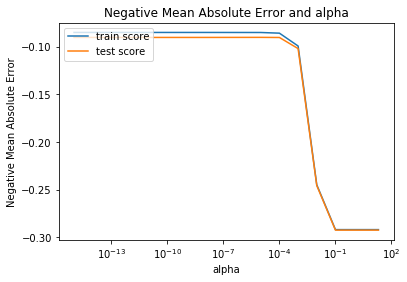

In [390]:
# plotting mean test and train scoes with alpha 
cv_results3['param_alpha'] = cv_results3['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results3['param_alpha'], cv_results3['mean_train_score'])
plt.plot(cv_results3['param_alpha'], cv_results3['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [391]:
elastic_1 = model_cv3.best_estimator_

In [392]:
elastic_1.fit(X_train_imp, y_train)
r2 = elastic_1.score(X_train_imp,y_train)
print('R2: {}'.format(r2))
print('Adjusted R2: {}'.format(calculate_adj_r2(r2,X_train_imp)))

R2: 0.8881693761667877
Adjusted R2: 0.8825426781122865


In [393]:
elastic_1.score(X_test_imp,y_test)

0.907329855100842

## Step 6: Model Evaluation

Ridge model - **ridge_1** (train r2 score **0.89** and test r2 score **0.90**) is used to make prediction on test data - 

In [394]:
y_test_pred = ridge_1.predict(X_test_imp)
#y_pred = elastic_1.predict(X_test_imp)

Text(0, 0.5, 'y_pred')

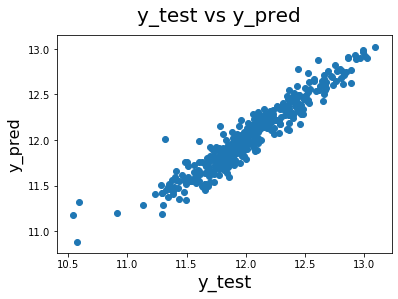

In [395]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

For all the models, R2 score for test set is close to train set, model learnt on train set able to generalize on test set

In [396]:
predicted_final = pd.DataFrame(y_test_pred,columns=['SalePrice'])

In [397]:
#invert the log predictions using np.exm1 -
predicted_final['SalePrice'] = np.ceil(np.expm1(predicted_final.SalePrice))

In [398]:
#this is the predicted SalePrice for test data -
predicted_final

,SalePrice
0,435746.0
1,218288.0
2,240199.0
3,149387.0
4,306556.0
...,...
426,137732.0
427,140042.0
428,205026.0
429,162204.0


## Below code is to answer questions of Part:II

Question 1: <br>
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [399]:
#earlier, alpha was 0.00001
lasso_3 = Lasso(alpha=0.00002, normalize=True)
lasso_3.fit(X_train, y_train)
print('r2 score on train dataset -')
print(lasso_3.score(X_train,y_train))
print('-'*50)
print('r2 score on test dataset -')
print(lasso_3.score(X_test,y_test))

r2 score on train dataset -
0.8891053909415985
--------------------------------------------------
r2 score on test dataset -
0.9050492749928458


In [400]:
imp_df_1 = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": lasso_3.coef_
})

In [401]:
imp_df_1 = imp_df_1[imp_df_1.Imp != 0]
imp_df_1.sort_values(by="Imp", ascending=False)

,Varname,Imp
63,SaleType_New,0.118174
17,GrLivArea,0.091138
8,OverallQual,0.083798
28,SaleCondition,0.078236
0,MSZoning,0.067256
52,BsmtQual_Ex,0.064357
19,Functional,0.063638
15,CentralAir,0.057908
6,Condition1,0.050775
37,LotConfig_CulDSac,0.048711


Question 3:<br>
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


Top 5 features as per original Lasso model -
1. SaleType_New
2. GrLivArea
3. OverallQual
4. BsmtQual_Ex
5. Functional

Lets' build a model without the 5 features.

In [402]:
X_train_new = X_train[[c for c in X_train.columns if c not in ['SaleType_New','GrLivArea','OverallQual','BsmtQual_Ex','Functional']]]

In [403]:
lasso_4 = Lasso(alpha=0.00001, normalize=True)
lasso_4.fit(X_train_new, y_train)
print('r2 score on train dataset -')
print(lasso_3.score(X_train,y_train))
print('-'*50)
print('r2 score on test dataset -')
print(lasso_3.score(X_test,y_test))

r2 score on train dataset -
0.8891053909415985
--------------------------------------------------
r2 score on test dataset -
0.9050492749928458


In [404]:
imp_df_2 = pd.DataFrame({
    "Varname": X_train_new.columns,
    "Imp": lasso_4.coef_
})
imp_df_2 = imp_df_2[imp_df_2.Imp != 0]
imp_df_2.sort_values(by="Imp", ascending=False)

,Varname,Imp
43,ExterQual_Ex,0.136264
13,TotalBsmtSF,0.110168
44,ExterQual_Gd,0.092576
14,CentralAir,0.085466
32,MSSubClass_2_Story,0.081985
0,MSZoning,0.067234
25,SaleCondition,0.066339
17,Fireplaces,0.064429
19,GarageArea,0.063962
8,OverallCond,0.063028
